In [2]:
# Mount Google Drive to save/load files from Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Clone the LLM-Sentiment GitHub repo and change directory into it
import os

repo_path = "/content/LLM-Sentiment"

if not os.path.exists(repo_path):
    print("Folder does NOT exist — cloning the repo...")
    !git clone https://github.com/DAMO-NLP-SG/LLM-Sentiment.git
else:
    print("Folder already exists. Skipping clone.")

%cd /content/LLM-Sentiment
!ls

Folder does NOT exist — cloning the repo...
Cloning into 'LLM-Sentiment'...
remote: Enumerating objects: 621, done.
remote: Counting objects: 100% (621/621), done.
remote: Compressing objects: 100% (363/363), done.
remote: Total 621 (delta 27), reused 613 (delta 23), pack-reused 0 (from 0)
Receiving objects: 100% (621/621), 1.32 MiB | 11.49 MiB/s, done.
Resolving deltas: 100% (27/27), done.
/content/LLM-Sentiment
data  evaluate.py  LICENSE  predict.py	README.md  requirements.txt  script


In [4]:
# Upgrade pip
!pip install -q --upgrade pip

# Install the old OpenAI client and other libraries required by code
!pip install -q \
  "openai==0.27.2" \
  "tqdm>=4.65" \
  "tenacity>=8.2.2" \
  "numpy>=1.24" \
  "pandas>=2.0" \
  "scikit-learn>=1.4" \
  "transformers>=4.36" \
  "torch>=2.0"

import openai
import numpy as np
import pandas as pd
import sklearn
import torch
import transformers

print("Packages installed and imported ✔️")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 16.7 MB/s eta 0:00:00
Packages installed and imported ✔️


In [ ]:
# Configure the OpenAI API key in the environment and test one simple API call
import os
import openai

os.environ["OPENAI_API_KEY"] = "API key deleted for safety reasons before comitting to GitHub"

# Quick test using the old API style to make sure it works
openai.api_key = os.environ["OPENAI_API_KEY"]

resp = openai.ChatCompletion.create(
    model="gpt-4o-mini",
    messages=[{"role": "user", "content": "Hello from Colab"}]
)
print(resp["choices"][0]["message"]["content"])


Hello! How can I assist you today with Google Colab? If you have any questions or need help with a specific task, feel free to ask!


In [ ]:
# Run the zero-shot experiment script from the original paper to generate model predictions
%cd /content/LLM-Sentiment

!bash script/run_zero_shot.sh

/content/LLM-Sentiment
Predict on Task: sc, Dataset: asc_lap14
Processing asc_lap14: 100% 500/500 [02:25<00:00,  3.45it/s]
Predict on Task: sc, Dataset: asc_rest14
Processing asc_rest14: 100% 500/500 [02:32<00:00,  3.27it/s]
Predict on Task: sc, Dataset: imdb
Processing imdb: 100% 500/500 [02:40<00:00,  3.11it/s]
Predict on Task: sc, Dataset: mr
Processing mr: 100% 500/500 [02:22<00:00,  3.51it/s]
Predict on Task: sc, Dataset: sst2
Processing sst2:  55% 275/500 [01:22<01:00,  3.70it/s]The server had an error while processing your request. Sorry about that! {
  "error": {
    "message": "The server had an error while processing your request. Sorry about that!",
    "type": "server_error",
    "param": null,
    "code": null
  }
} 500 {'error': {'message': 'The server had an error while processing your request. Sorry about that!', 'type': 'server_error', 'param': None, 'code': None}} {'Date': 'Sat, 06 Dec 2025 05:00:19 GMT', 'Content-Type': 'application/json', 'Content-Length': '175', 'C

In [ ]:
# Run the evaluation script to compute accuracy/F1 metrics on all tasks and datasets
%cd /content/LLM-Sentiment
!bash script/eval_zero_shot.sh

/content/LLM-Sentiment
----------------------------------------------------------------------------------------------------
Gold:
neutral: 132 (26.40%)
positive: 269 (53.80%)
negative: 99 (19.80%)
Pred:
positive: 369 (73.80%)
neutral: 17 (3.40%)
negative: 114 (22.80%)
Accuracy score for asc_lap14 = 0.74
----------------------------------------------------------------------------------------------------
Gold:
positive: 328 (65.60%)
negative: 92 (18.40%)
neutral: 80 (16.00%)
Pred:
positive: 392 (78.40%)
negative: 99 (19.80%)
neutral: 9 (1.80%)
Accuracy score for asc_rest14 = 0.824
----------------------------------------------------------------------------------------------------
Gold:
positive: 266 (53.20%)
negative: 234 (46.80%)
Pred:
positive: 254 (50.80%)
negative: 246 (49.20%)
Accuracy score for imdb = 0.956
----------------------------------------------------------------------------------------------------
Gold:
negative: 248 (49.60%)
positive: 252 (50.40%)
Pred:
positive: 249 (49.

In [ ]:
# Load IMDB test dataset from the project's data folder, display its structure and first rows
%cd /content/LLM-Sentiment

import pandas as pd

df_imdb = pd.read_csv("outputs/zero-shot/model_chat/seed_42/sc/imdb/prediction.csv")
df_imdb.head()

/content/LLM-Sentiment


,original_index,text,label,label_text,prediction,prompt
0,6868,`` Jack and Kate meet the physician Daniel Far...,1,positive,positive,Please perform Sentiment Classification task.\...
1,24016,"`` After watching this film , I thought to mys...",0,negative,negative,Please perform Sentiment Classification task.\...
2,9668,"It is movie about love , violence , illegal af...",1,positive,positive,Please perform Sentiment Classification task.\...
3,13640,`` Maybe if you smoked enough weed this would ...,0,negative,negative,Please perform Sentiment Classification task.\...
4,14018,`` Not since `` '' 8 Heads in a Duffel Bag '' ...,0,negative,negative,Please perform Sentiment Classification task.\...


In [ ]:
# List all dataset files inside the data/ folder, show available test.csv files for all tasks and datasets
%cd /content/LLM-Sentiment
!find data -maxdepth 3 -type f

/content/LLM-Sentiment
data/absa/aste_rest15/test.csv
data/absa/aste_rest16/test.csv
data/absa/asqp_rest16/test.csv
data/absa/uabsa_rest15/test.csv
data/absa/uabsa_rest14/test.csv
data/absa/aste_rest14/test.csv
data/absa/uabsa_rest16/test.csv
data/absa/uabsa_laptop14/test.csv
data/absa/asqp_rest15/test.csv
data/absa/aste_laptop14/test.csv
data/mast/hate/test.csv
data/mast/stance/test.csv
data/mast/compsent19/test.csv
data/mast/offensive/test.csv
data/mast/irony/test.csv
data/mast/implicit/test.csv
data/mast/emotion/test.csv
data/sc/sst5/test.csv
data/sc/yelp2/test.csv
data/sc/sst2/test.csv
data/sc/mr/test.csv
data/sc/asc_lap14/test.csv
data/sc/yelp5/test.csv
data/sc/twitter/test.csv
data/sc/asc_rest14/test.csv
data/sc/imdb/test.csv


In [ ]:
# Navigate back to the LLM-Sentiment project root folder
%cd /content/LLM-Sentiment

/content/LLM-Sentiment


Contribution: TF-IDF + Logistic Regression baseline on IMDB


In [7]:
# Load the IMDB test dataset from the paper's repo and inspect its basic structure
import os
import pandas as pd

os.chdir("/content/LLM-Sentiment")

df_imdb = pd.read_csv("data/sc/imdb/test.csv")

print("Number of rows:", len(df_imdb))
print(df_imdb.head())
print(df_imdb.columns)

Number of rows: 500
   original_index                                               text  label  \
0            6868  `` Jack and Kate meet the physician Daniel Far...      1   
1           24016  `` After watching this film , I thought to mys...      0   
2            9668  It is movie about love , violence , illegal af...      1   
3           13640  `` Maybe if you smoked enough weed this would ...      0   
4           14018  `` Not since `` '' 8 Heads in a Duffel Bag '' ...      0   

  label_text  
0   positive  
1   negative  
2   positive  
3   negative  
4   negative  
Index(['original_index', 'text', 'label', 'label_text'], dtype='object')


In [8]:
# Split the IMDB data into train and test sets (80/20) for supervised sentiment classification
from sklearn.model_selection import train_test_split

# Use the review text as features and numeric label as target
X = df_imdb["text"]
y = df_imdb["label"]   # 0 = negative, 1 = positive

# Split into train (80%) and test (20%)
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y  # keeps class balance
)

print("Train size:", len(X_train))
print("Test size:", len(X_test))

Train size: 400
Test size: 100


In [9]:
# Convert the review texts into TF-IDF features using unigrams and bigrams for model input
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(
    max_features=20000,      # limit number of words/phrases
    ngram_range=(1, 2),      # unigrams + bigrams
    stop_words="english"     # remove common English stop words
)

# Learn vocabulary on training data and transform
X_train_vec = vectorizer.fit_transform(X_train)

# Transform test data using the same vocabulary
X_test_vec = vectorizer.transform(X_test)

X_train_vec.shape, X_test_vec.shape

((400, 20000), (100, 20000))

In [10]:
# Train a logistic regression sentiment classifier on the TF-IDF features
from sklearn.linear_model import LogisticRegression

# Simple baseline classifier
logreg = LogisticRegression(
    max_iter=1000,
    n_jobs=-1
)

logreg.fit(X_train_vec, y_train)
print("Model trained!")

Model trained!


In [11]:
# Evaluate the logistic regression model with accuracy, classification report, and confusion matrix
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred = logreg.predict(X_test_vec)

acc = accuracy_score(y_test, y_pred)
print("Logistic Regression IMDB accuracy:", acc)

print("\nClassification report:")
print(classification_report(
    y_test,
    y_pred,
    target_names=["negative", "positive"]
))

print("\nConfusion matrix:")
print(confusion_matrix(y_test, y_pred))

Logistic Regression IMDB accuracy: 0.79

Classification report:
              precision    recall  f1-score   support

    negative       0.91      0.62      0.73        47
    positive       0.74      0.94      0.83        53

    accuracy                           0.79       100
   macro avg       0.82      0.78      0.78       100
weighted avg       0.82      0.79      0.78       100


Confusion matrix:
[[29 18]
 [ 3 50]]


In [12]:
# Train an MLP classifier on the same TF-IDF features
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(
    hidden_layer_sizes=(128, 64),
    activation="relu",
    solver="adam",
    max_iter=20,
    random_state=42
)

mlp.fit(X_train_vec, y_train)
print("MLP model trained!")

MLP model trained!


/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


In [13]:
# Evaluate the MLP classifier on the IMDB test set
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

mlp_pred = mlp.predict(X_test_vec)

mlp_acc = accuracy_score(y_test, mlp_pred)
print("MLP IMDB accuracy:", mlp_acc)

print("\nClassification report:")
print(classification_report(
    y_test,
    mlp_pred,
    target_names=["negative", "positive"]
))

print("\nConfusion matrix:")
print(confusion_matrix(y_test, mlp_pred))

MLP IMDB accuracy: 0.72

Classification report:
              precision    recall  f1-score   support

    negative       0.88      0.47      0.61        47
    positive       0.67      0.94      0.78        53

    accuracy                           0.72       100
   macro avg       0.77      0.71      0.70       100
weighted avg       0.77      0.72      0.70       100


Confusion matrix:
[[22 25]
 [ 3 50]]


In [14]:
# Save MLP predictions to outputs folder
import os

output_dir_mlp = "outputs/contrib_mlp/imdb"
os.makedirs(output_dir_mlp, exist_ok=True)

mlp_df = pd.DataFrame({
    "text": X_test.reset_index(drop=True),
    "gold_label": y_test.reset_index(drop=True),
    "pred_label": mlp_pred
})

mlp_csv_path = os.path.join(output_dir_mlp, "prediction.csv")
mlp_df.to_csv(mlp_csv_path, index=False)

print("Saved MLP predictions to:", mlp_csv_path)

Saved MLP predictions to: outputs/contrib_mlp/imdb/prediction.csv


In [15]:
# Compare Logistic Regression vs MLP performance
comparison = pd.DataFrame({
    "Model": ["Logistic Regression", "MLP"],
    "Accuracy": [acc, mlp_acc]
})

comparison

,Model,Accuracy
0,Logistic Regression,0.79
1,MLP,0.72


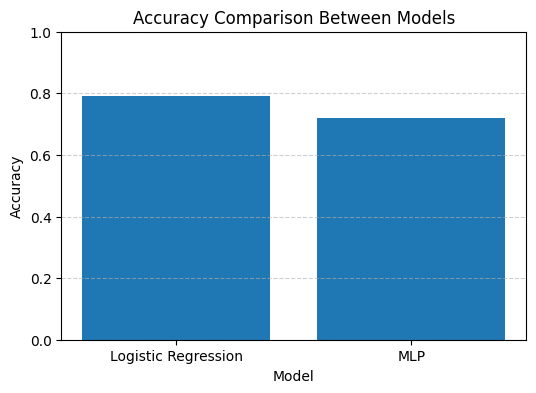

In [16]:
# Model Accuracy Bar Chart

import matplotlib.pyplot as plt

# Create simple lists with model names and their accuracies
models = ["Logistic Regression", "MLP"]
scores = [acc, mlp_acc]   # 'acc' = logreg accuracy, 'mlp_acc' = MLP accuracy

# Make the bar chart
plt.figure(figsize=(6,4))
plt.bar(models, scores)

# Add chart labels
plt.title("Accuracy Comparison Between Models")
plt.xlabel("Model")
plt.ylabel("Accuracy")

# Set Y-axis from 0 to 1 for readability
plt.ylim(0, 1)

# Add horizontal grid lines for better visual clarity
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Show the chart
plt.show()

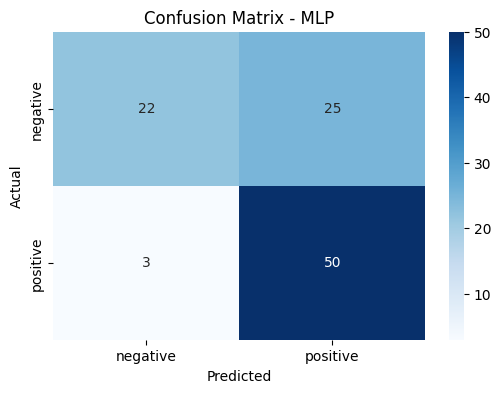

In [17]:
# Confusion Matrix Heatmap for MLP

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Build confusion matrix for MLP predictions
cm = confusion_matrix(y_test, mlp_pred)

# Draw a heatmap for easier visualization
plt.figure(figsize=(6,4))
sns.heatmap(
    cm,
    annot=True,           # show numbers inside squares
    fmt='d',              # display as integers
    cmap='Blues',         # choose a blue color gradient
    xticklabels=["negative", "positive"],
    yticklabels=["negative", "positive"]
)

# Add basic labels
plt.title("Confusion Matrix - MLP")
plt.xlabel("Predicted")
plt.ylabel("Actual")

plt.show()

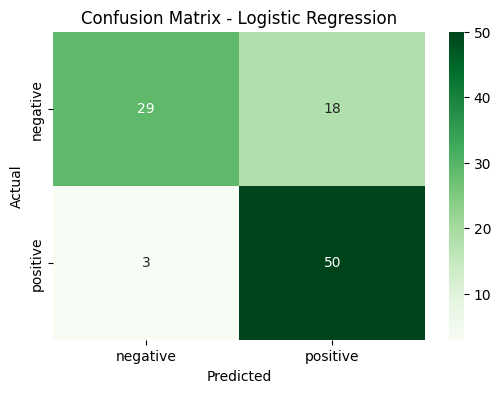

In [18]:
# Make confusion matrix for Logistic Regression predictions
cm_logreg = confusion_matrix(y_test, y_pred)

# Plot heatmap for it
plt.figure(figsize=(6,4))
sns.heatmap(
    cm_logreg,
    annot=True,
    fmt='d',
    cmap='Greens',
    xticklabels=["negative", "positive"],
    yticklabels=["negative", "positive"]
)

plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")

plt.show()

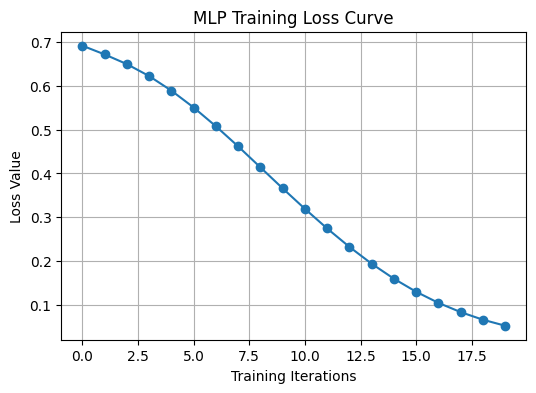

In [19]:
# MLP Training Loss Curve

import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
plt.plot(mlp.loss_curve_, marker='o')

plt.title("MLP Training Loss Curve")
plt.xlabel("Training Iterations")
plt.ylabel("Loss Value")

plt.grid(True)
plt.show()

In [20]:
# Save the model’s predictions and gold labels on the IMDB test set to a CSV file in the outputs folder
import os

output_dir = "outputs/contrib_logreg/imdb"
os.makedirs(output_dir, exist_ok=True)

contrib_df = pd.DataFrame({
    "text": X_test.reset_index(drop=True),
    "gold_label": y_test.reset_index(drop=True),
    "pred_label": y_pred
})

csv_path = os.path.join(output_dir, "prediction.csv")
contrib_df.to_csv(csv_path, index=False)

print("Saved contribution predictions to:", csv_path)

Saved contribution predictions to: outputs/contrib_logreg/imdb/prediction.csv


In [21]:
from google.colab import files
files.download("/content/LLM-Sentiment/outputs/contrib_logreg/imdb/prediction.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>